In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import pandas as pd
import data_settings as settings
import numpy as np
import seaborn as sns

In [53]:
df_train = pd.read_csv("./data/no1_train.csv")
df_train.describe()

,hydro,micro,thermal,wind,river,total,y,sys_reg,flow
count,225088.000000,225088.000000,225088.000000,225088.000000,225088.0,225088.000000,225088.000000,225088.000000,225088.000000
mean,1888.334127,224.189826,21.803497,55.703266,0.0,2190.031963,8.907921,-8.284305,-1999.055081
std,401.000305,58.559855,3.579229,47.053033,0.0,444.077730,320.262539,43.748315,1311.682286
min,683.438000,80.371000,0.000000,0.000000,0.0,849.732000,-1579.680903,-828.000000,-5541.200000
25%,1625.029000,185.017000,22.100000,15.704000,0.0,1916.523000,-142.226700,0.000000,-2996.700000
50%,1933.916000,225.938000,22.100000,41.848000,0.0,2248.874000,-11.282351,0.000000,-1953.700000
75%,2175.595000,269.558000,24.100000,88.723000,0.0,2497.792000,127.454943,0.000000,-906.900000
max,2995.524000,349.271000,25.700000,176.000000,0.0,3351.974000,2956.333317,474.000000,723.400000


# Data preprocessing

### Clamp

In [54]:
from preprocessing import filter_column_based_on_quantile

df_train = filter_column_based_on_quantile(df_train, 0.001, settings.COLUMNS_TO_CLAMP)
df_train.describe()

,hydro,micro,thermal,wind,river,total,y,sys_reg,flow
count,224636.000000,224636.000000,224636.000000,224636.000000,224636.0,224636.000000,224636.000000,224636.000000,224636.000000
mean,1888.924507,224.259340,21.801231,55.613476,0.0,2190.599804,7.496014,-8.279254,-2000.194678
std,400.195368,58.478465,3.581429,47.029993,0.0,443.252455,308.588482,43.759360,1311.949926
min,683.438000,80.371000,0.000000,0.000000,0.0,849.732000,-997.412582,-828.000000,-5541.200000
25%,1626.367000,185.091000,22.100000,15.663500,0.0,1917.963000,-141.931476,0.000000,-2998.900000
50%,1934.012000,226.002000,22.100000,41.728000,0.0,2249.096000,-11.282351,0.000000,-1954.500000
75%,2175.595000,269.558000,24.100000,88.490000,0.0,2497.792000,127.095807,0.000000,-907.520000
max,2995.524000,349.271000,25.700000,176.000000,0.0,3351.974000,2243.579521,474.000000,643.600000


### Add time features

<AxesSubplot:ylabel='time_of_week'>

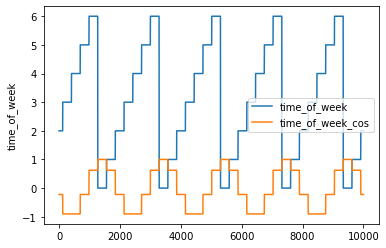

In [55]:
from preprocessing import add_date_time_features

df_train = add_date_time_features(df_train, settings.ONE_HOT_ENCODE_TIME)
sns.lineplot(data=df_train[0:10000], x=df_train.index[0:10000], y="time_of_week", label="time_of_week")
sns.lineplot(data=df_train[0:10000], x=df_train.index[0:10000], y="time_of_week_cos", label="time_of_week_cos")


### Structural Imbalances (5.2.2)

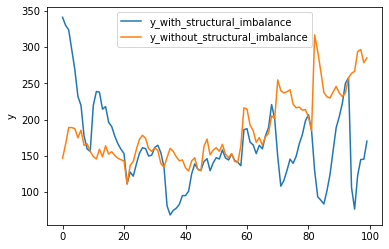

In [56]:
from preprocessing import add_structural_imbalance

df_train = add_structural_imbalance(df_train)
if settings.AVOID_STRUCTURAL_IMBALANCE:
    sns.lineplot(data=df_train[0:100], x=df_train.index[0:100], y='y', label="y_with_structural_imbalance")
    df_train["y"] = df_train["y"] - df_train["structural_imbalance"]
    sns.lineplot(data=df_train[0:100], x=df_train.index[0:100], y='y', label="y_without_structural_imbalance")

<AxesSubplot:ylabel='sum'>

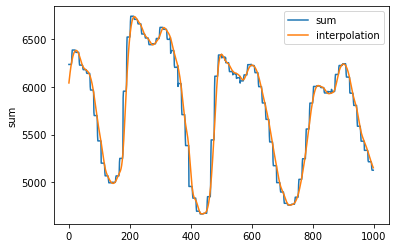

In [57]:
sns.lineplot(data=df_train[0:1000], x=df_train.index[0:1000], y='sum', label="sum")
sns.lineplot(data=df_train[0:1000], x=df_train.index[0:1000], y='interpolation', label="interpolation")

### Normalization

In [58]:
from preprocessing import normalize_columns

df_train = normalize_columns(df_train, settings.COLUMNS_TO_NORMALIZE)
df_train.describe()

,hydro,micro,thermal,wind,river,total,y,sys_reg,flow,time_of_day,time_of_week,time_of_year,time_of_hour,time_of_day_cos,time_of_week_cos,time_of_year_cos,time_of_hour_cos,interpolation,structural_imbalance,sum
count,224636.000000,224636.000000,224636.000000,224636.000000,224636.0,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,2.246360e+05,224636.000000,2.246360e+05,2.246360e+05,2.246360e+05,2.246360e+05,224636.000000
mean,0.042770,0.070200,0.696594,-0.368029,0.0,0.071733,-0.996009,0.259172,0.145067,11.506637,3.004879,5.197649,5.500085,5.660265e-05,-0.001250,5.704966e-02,-3.258831e-06,5.059144e+03,-8.683494e+02,4190.794482
std,0.346177,0.434946,0.278710,0.534432,0.0,0.354284,0.035011,0.067219,0.424250,6.922453,1.999286,3.555645,3.452106,7.069566e-01,0.706932,7.216346e-01,7.071241e-01,2.834955e+04,2.830760e+04,1354.295925
min,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-0.900969,-1.000000e+00,-1.000000e+00,1.692288e+03,-1.615087e+06,1695.987000
25%,-0.184348,-0.221123,0.719844,-0.822006,0.0,-0.146181,-0.997644,0.271889,-0.177888,6.000000,1.000000,2.000000,2.750000,-7.071068e-01,-0.900969,-5.000000e-01,-8.660254e-01,3.072936e+03,-4.135602e+02,3072.441250
50%,0.081771,0.083161,0.719844,-0.525818,0.0,0.118488,-0.997085,0.271889,0.159843,12.000000,3.000000,5.000000,6.000000,6.123234e-17,-0.222521,6.123234e-17,-1.836970e-16,4.053514e+03,-7.668998e-04,4043.527500
75%,0.290745,0.407118,0.875486,0.005568,0.0,0.317267,-0.996547,0.271889,0.498409,18.000000,5.000000,8.000000,8.250000,7.071068e-01,0.623490,8.660254e-01,8.660254e-01,5.238057e+03,3.952684e+02,5228.666250
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,23.000000,6.000000,11.000000,11.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.619606e+06,2.107211e+03,8130.399000


### Lag features

In [59]:
# Previous y lag feature
df_train["y_prev"] = df_train["y"].shift(1)

# Add power imbalance from 24 hours ago
df_train["y_prev_24h"] = df_train["y"].shift(24*60//5)

# Mean power imbalance yesterday
df_train = pd.merge_asof(
    df_train,
    df_train.resample('D', on="start_time")["y"].mean().shift(1),
    right_index=True,
    left_on="start_time",
)
df_train = df_train.rename(columns={"y_x": "y", "y_y": "y_yesterday"})

df_train.describe()

,hydro,micro,thermal,wind,river,total,y,sys_reg,flow,time_of_day,...,time_of_day_cos,time_of_week_cos,time_of_year_cos,time_of_hour_cos,interpolation,structural_imbalance,sum,y_prev,y_prev_24h,y_yesterday
count,224636.000000,224636.000000,224636.000000,224636.000000,224636.0,224636.000000,224636.000000,224636.000000,224636.000000,224636.000000,...,2.246360e+05,224636.000000,2.246360e+05,2.246360e+05,2.246360e+05,2.246360e+05,224636.000000,224635.000000,224348.000000,224518.000000
mean,0.042770,0.070200,0.696594,-0.368029,0.0,0.071733,-0.996009,0.259172,0.145067,11.506637,...,5.660265e-05,-0.001250,5.704966e-02,-3.258831e-06,5.059144e+03,-8.683494e+02,4190.794482,-0.996018,-0.997052,-0.996962
std,0.346177,0.434946,0.278710,0.534432,0.0,0.354284,0.035011,0.067219,0.424250,6.922453,...,7.069566e-01,0.706932,7.216346e-01,7.071241e-01,2.834955e+04,2.830760e+04,1354.295925,0.034756,0.001692,0.007828
min,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,-1.000000e+00,-0.900969,-1.000000e+00,-1.000000e+00,1.692288e+03,-1.615087e+06,1695.987000,-1.000000,-1.000000,-0.998258
25%,-0.184348,-0.221123,0.719844,-0.822006,0.0,-0.146181,-0.997644,0.271889,-0.177888,6.000000,...,-7.071068e-01,-0.900969,-5.000000e-01,-8.660254e-01,3.072936e+03,-4.135602e+02,3072.441250,-0.997644,-0.997645,-0.997293
50%,0.081771,0.083161,0.719844,-0.525818,0.0,0.118488,-0.997085,0.271889,0.159843,12.000000,...,6.123234e-17,-0.222521,6.123234e-17,-1.836970e-16,4.053514e+03,-7.668998e-04,4043.527500,-0.997085,-0.997086,-0.997102
75%,0.290745,0.407118,0.875486,0.005568,0.0,0.317267,-0.996547,0.271889,0.498409,18.000000,...,7.071068e-01,0.623490,8.660254e-01,8.660254e-01,5.238057e+03,3.952684e+02,5228.666250,-0.996547,-0.996551,-0.996904
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,23.000000,...,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.619606e+06,2.107211e+03,8130.399000,0.987582,-0.869406,-0.425803


In [60]:
# Drop the NAs
df_train = df_train.dropna()
df_train.describe()


,hydro,micro,thermal,wind,river,total,y,sys_reg,flow,time_of_day,...,time_of_day_cos,time_of_week_cos,time_of_year_cos,time_of_hour_cos,interpolation,structural_imbalance,sum,y_prev,y_prev_24h,y_yesterday
count,224348.000000,224348.000000,224348.000000,224348.000000,224348.0,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,...,2.243480e+05,224348.000000,2.243480e+05,2.243480e+05,2.243480e+05,2.243480e+05,224348.000000,224348.000000,224348.000000,224348.000000
mean,0.042992,0.071002,0.697623,-0.367801,0.0,0.072051,-0.996008,0.259161,0.145944,11.506646,...,5.667531e-05,-0.000452,5.583917e-02,-3.263015e-06,5.057954e+03,-8.694733e+02,4188.480686,-0.996017,-0.997052,-0.996962
std,0.346206,0.434648,0.277404,0.534680,0.0,0.354278,0.035033,0.067237,0.423798,6.922453,...,7.069564e-01,0.706933,7.213058e-01,7.071241e-01,2.836772e+04,2.832574e+04,1353.453619,0.034779,0.001692,0.007831
min,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,-1.000000e+00,-0.900969,-1.000000e+00,-1.000000e+00,1.692288e+03,-1.615087e+06,1695.987000,-1.000000,-1.000000,-0.998258
25%,-0.183943,-0.220052,0.719844,-0.822187,0.0,-0.145358,-0.997645,0.271889,-0.176368,6.000000,...,-7.071068e-01,-0.900969,-5.000000e-01,-8.660254e-01,3.071959e+03,-4.144586e+02,3071.364000,-0.997645,-0.997645,-0.997293
50%,0.082112,0.084061,0.719844,-0.525818,0.0,0.118713,-0.997086,0.271889,0.160739,12.000000,...,6.123234e-17,-0.222521,6.123234e-17,-1.836970e-16,4.050477e+03,-7.360529e-04,4040.504000,-0.997086,-0.997086,-0.997102
75%,0.291204,0.407772,0.875486,0.006750,0.0,0.317651,-0.996546,0.271889,0.498849,18.000000,...,7.071068e-01,0.623490,8.660254e-01,8.660254e-01,5.234644e+03,3.960143e+02,5224.239000,-0.996546,-0.996551,-0.996904
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,23.000000,...,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.619606e+06,2.107211e+03,8130.399000,0.987582,-0.869406,-0.425803


### Drop columns we don't want to use

In [61]:
df_train = df_train.drop(columns=settings.COLUMNS_TO_DROP)
df_train

,hydro,micro,thermal,wind,total,y,sys_reg,flow,time_of_day,time_of_week,...,time_of_day_cos,time_of_week_cos,time_of_year_cos,time_of_hour_cos,interpolation,structural_imbalance,sum,y_prev,y_prev_24h,y_yesterday
288,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.996665,0.271889,-0.578062,14,3,...,-0.866025,-0.900969,1.0,5.000000e-01,6.480062e+03,2.984241e+01,6509.904,-0.996668,-0.996910,-0.996841
289,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.996668,0.271889,-0.578062,14,3,...,-0.866025,-0.900969,1.0,6.123234e-17,6.484185e+03,2.571912e+01,6509.904,-0.996665,-0.996886,-0.996841
290,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.996667,0.271889,-0.578062,14,3,...,-0.866025,-0.900969,1.0,-5.000000e-01,6.488523e+03,2.138131e+01,6509.904,-0.996668,-0.996858,-0.996841
291,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.996695,0.271889,-0.578062,14,3,...,-0.866025,-0.900969,1.0,-8.660254e-01,6.493133e+03,1.677122e+01,6509.904,-0.996667,-0.996858,-0.996841
292,0.191042,-0.567966,-0.105058,-0.281682,0.137997,-0.996703,0.271889,-0.578062,14,3,...,-0.866025,-0.900969,1.0,-1.000000e+00,6.498073e+03,1.183108e+01,6509.904,-0.996695,-0.996860,-0.996841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225083,0.089101,-0.170621,0.564202,0.209443,0.132078,0.950581,0.271889,0.063349,3,0,...,0.707107,1.000000,0.5,8.660254e-01,1.579570e+06,-1.575051e+06,4518.998,0.938357,-0.877230,-0.425803
225084,0.089101,-0.170621,0.564202,0.209443,0.132078,0.962863,0.271889,0.063349,3,0,...,0.707107,1.000000,0.5,5.000000e-01,1.589516e+06,-1.584997e+06,4518.998,0.950581,-0.875283,-0.425803
225085,0.089101,-0.170621,0.564202,0.209443,0.132078,0.975171,0.271889,0.063349,3,0,...,0.707107,1.000000,0.5,6.123234e-17,1.599504e+06,-1.594985e+06,4518.998,0.962863,-0.873346,-0.425803
225086,0.089101,-0.170621,0.564202,0.209443,0.132078,0.987582,0.271889,0.063349,3,0,...,0.707107,1.000000,0.5,-5.000000e-01,1.609534e+06,-1.605015e+06,4518.998,0.975171,-0.871380,-0.425803


Move y_prev to the last column, this will be useful later.

In [62]:
df_train = df_train[[c for c in df_train if c not in ['y_prev']] 
       + ['y_prev']]
df_train.describe()

,hydro,micro,thermal,wind,total,y,sys_reg,flow,time_of_day,time_of_week,...,time_of_day_cos,time_of_week_cos,time_of_year_cos,time_of_hour_cos,interpolation,structural_imbalance,sum,y_prev_24h,y_yesterday,y_prev
count,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,...,2.243480e+05,224348.000000,2.243480e+05,2.243480e+05,2.243480e+05,2.243480e+05,224348.000000,224348.000000,224348.000000,224348.000000
mean,0.042992,0.071002,0.697623,-0.367801,0.072051,-0.996008,0.259161,0.145944,11.506646,3.005411,...,5.667531e-05,-0.000452,5.583917e-02,-3.263015e-06,5.057954e+03,-8.694733e+02,4188.480686,-0.997052,-0.996962,-0.996017
std,0.346206,0.434648,0.277404,0.534680,0.354278,0.035033,0.067237,0.423798,6.922453,2.000436,...,7.069564e-01,0.706933,7.213058e-01,7.071241e-01,2.836772e+04,2.832574e+04,1353.453619,0.001692,0.007831,0.034779
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,...,-1.000000e+00,-0.900969,-1.000000e+00,-1.000000e+00,1.692288e+03,-1.615087e+06,1695.987000,-1.000000,-0.998258,-1.000000
25%,-0.183943,-0.220052,0.719844,-0.822187,-0.145358,-0.997645,0.271889,-0.176368,6.000000,1.000000,...,-7.071068e-01,-0.900969,-5.000000e-01,-8.660254e-01,3.071959e+03,-4.144586e+02,3071.364000,-0.997645,-0.997293,-0.997645
50%,0.082112,0.084061,0.719844,-0.525818,0.118713,-0.997086,0.271889,0.160739,12.000000,3.000000,...,6.123234e-17,-0.222521,6.123234e-17,-1.836970e-16,4.050477e+03,-7.360529e-04,4040.504000,-0.997086,-0.997102,-0.997086
75%,0.291204,0.407772,0.875486,0.006750,0.317651,-0.996546,0.271889,0.498849,18.000000,5.000000,...,7.071068e-01,0.623490,8.660254e-01,8.660254e-01,5.234644e+03,3.960143e+02,5224.239000,-0.996551,-0.996904,-0.996546
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,6.000000,...,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.619606e+06,2.107211e+03,8130.399000,-0.869406,-0.425803,0.987582


### Add Gaussian Noise to y_prev

In [63]:
df_train['y_prev'] = df_train['y_prev'] + np.random.normal(0, settings.GAUSSIAN_NOISE, df_train['y_prev'].shape)
df_train.describe()

,hydro,micro,thermal,wind,total,y,sys_reg,flow,time_of_day,time_of_week,...,time_of_day_cos,time_of_week_cos,time_of_year_cos,time_of_hour_cos,interpolation,structural_imbalance,sum,y_prev_24h,y_yesterday,y_prev
count,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,224348.000000,...,2.243480e+05,224348.000000,2.243480e+05,2.243480e+05,2.243480e+05,2.243480e+05,224348.000000,224348.000000,224348.000000,224348.000000
mean,0.042992,0.071002,0.697623,-0.367801,0.072051,-0.996008,0.259161,0.145944,11.506646,3.005411,...,5.667531e-05,-0.000452,5.583917e-02,-3.263015e-06,5.057954e+03,-8.694733e+02,4188.480686,-0.997052,-0.996962,-0.996278
std,0.346206,0.434648,0.277404,0.534680,0.354278,0.035033,0.067237,0.423798,6.922453,2.000436,...,7.069564e-01,0.706933,7.213058e-01,7.071241e-01,2.836772e+04,2.832574e+04,1353.453619,0.001692,0.007831,0.105978
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,...,-1.000000e+00,-0.900969,-1.000000e+00,-1.000000e+00,1.692288e+03,-1.615087e+06,1695.987000,-1.000000,-0.998258,-1.515805
25%,-0.183943,-0.220052,0.719844,-0.822187,-0.145358,-0.997645,0.271889,-0.176368,6.000000,1.000000,...,-7.071068e-01,-0.900969,-5.000000e-01,-8.660254e-01,3.071959e+03,-4.144586e+02,3071.364000,-0.997645,-0.997293,-1.064700
50%,0.082112,0.084061,0.719844,-0.525818,0.118713,-0.997086,0.271889,0.160739,12.000000,3.000000,...,6.123234e-17,-0.222521,6.123234e-17,-1.836970e-16,4.050477e+03,-7.360529e-04,4040.504000,-0.997086,-0.997102,-0.997203
75%,0.291204,0.407772,0.875486,0.006750,0.317651,-0.996546,0.271889,0.498849,18.000000,5.000000,...,7.071068e-01,0.623490,8.660254e-01,8.660254e-01,5.234644e+03,3.960143e+02,5224.239000,-0.996551,-0.996904,-0.929639
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,6.000000,...,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.619606e+06,2.107211e+03,8130.399000,-0.869406,-0.425803,1.080866


### Save to .csv

In [64]:
df_train.to_csv("./data/train_dataset_2.csv", index=False)